In [42]:
from google.colab import files
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [43]:
uploaded = files.upload()
filename = next(iter(uploaded))

Saving Titanic.csv to Titanic (1).csv


In [44]:
titanic = pd.read_csv(filename)

In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Box plot will help us to find out the mean values**

<Axes: xlabel='Pclass', ylabel='Age'>

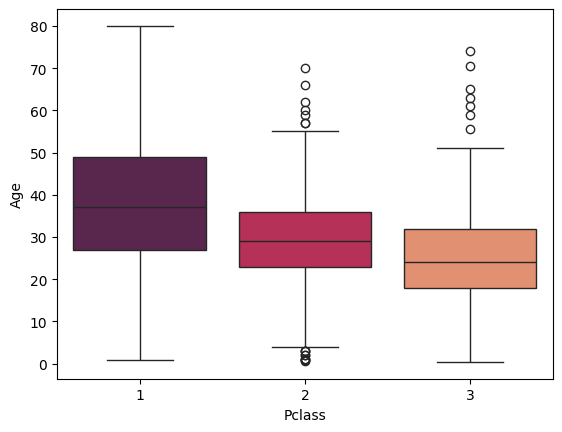

In [47]:
sns.boxplot(data=titanic, x=titanic.Pclass, y=titanic.Age, palette='rocket')

### Now replace NaN value with some other value.

In [48]:
def impute_age(cols, mean_ages):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        return mean_ages[pclass]
    else:
        return age

In [49]:
# titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [50]:
mean_ages = titanic.groupby('Pclass')['Age'].mean().to_dict()
mean_ages

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

In [51]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1, mean_ages=mean_ages)

In [52]:
titanic['Age'].isnull().sum()

0

<Axes: >

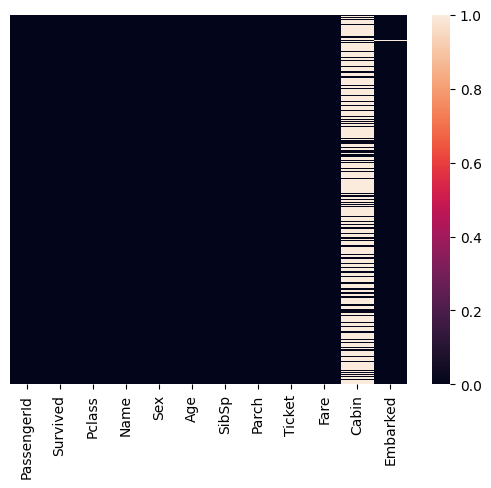

In [53]:
sns.heatmap(titanic.isnull(), xticklabels=True, yticklabels=False)

### When there is lots of Null values we need to do lots of  Feture Engineering

In [54]:
titanic.drop('Cabin', axis=1, inplace=True)

In [55]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [56]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Groupby one column and return the mean of the specified column

In [57]:
titanic.groupby('Pclass')

### How to see grouped data?

To view the

In [58]:
titanic.groupby('Pclass').first()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S


### Our dataset contains non-numeric

In [59]:
titanic.groupby('Pclass').mean(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [60]:
titanic.groupby('Pclass').mean(numeric_only=True)['Age']

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


### What are the distinct values present in a specific column?

In [61]:
titanic['Pclass'].unique()

array([3, 1, 2])

### What is the count of distinct values in a specific column?

In [62]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


### Categorical Data Cleaning

In [63]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Machine understand only numbers not the categorical data.

1. One Hot Encoding
2. Lable Encoding

### Separatin of categorical and numerical data tupes in 2 different variables

In [64]:
titanic_cat = titanic.select_dtypes(object)
titanic_cat

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [65]:
titanic_num = titanic.select_dtypes(['int64', 'float64'])
titanic_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00000,1,0,7.2500
1,2,1,1,38.00000,1,0,71.2833
2,3,1,3,26.00000,0,0,7.9250
3,4,1,1,35.00000,1,0,53.1000
4,5,0,3,35.00000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.00000,0,0,13.0000
887,888,1,1,19.00000,0,0,30.0000
888,889,0,3,25.14062,1,2,23.4500
889,890,1,1,26.00000,0,0,30.0000


### Conversion of Categorical Data

In [66]:
pd.get_dummies(titanic_cat)

,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem",...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
888,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [67]:
titanic_cat2 = titanic[['Sex', 'Embarked']]

In [68]:
titanic_dummies = pd.get_dummies(titanic_cat2)
titanic_dummies = titanic_dummies.astype(int)
titanic_dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


### Lable Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

### Instead of creating 3 different column in a titanic_dummies, it is showing in one column

In [71]:
le.fit_transform(titanic_cat2['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

## Assignments

You are given a dataset containing passenger deails on the Titanic dataset. Perform the following tasks:

1. Create a DataFrames with the following column and values:

  a. PassengerID

  b. Pclass

  c. Sex

  d. Embarked

2. Apply One Hot and Label Encoding to Convert Categorical Columns (Sex and Embarked) into numerical values.

3. Display the dataset before and after Encoding.

In [73]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
assignment_data = pd.DataFrame(titanic[['PassengerId', 'Pclass', 'Sex', 'Embarked']])
print("Original DataFrame:")
assignment_data.head()

Original DataFrame:


,PassengerId,Pclass,Sex,Embarked
0,1,3,male,S
1,2,1,female,C
2,3,3,female,S
3,4,1,female,S
4,5,3,male,S


### 2. Apply One Hot and Label Encoding to Convert Categorical Columns (Sex and Embarked) into numerical values.

In [89]:
assignment_cat = titanic[['Sex', 'Embarked']]
print("\nassignment_cat before One-Hot Encoding:")
assignment_cat


assignment_cat before One-Hot Encoding:


,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [90]:
assignment_titanic_dummies = pd.get_dummies(assignment_cat)
assignment_titanic_dummies = assignment_titanic_dummies.astype(int)
print("\nassignment_cat After One-Hot Encoding:")
assignment_titanic_dummies


assignment_cat After One-Hot Encoding:


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [93]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

assignment_data['Sex_encoded'] = label_encoder.fit_transform(assignment_data['Sex'])

assignment_data['Embarked_encoded'] = label_encoder.fit_transform(assignment_data['Embarked'])

print("\nDataFrame after Label Encoding:")
assignment_data[['PassengerId', 'Pclass', 'Sex_encoded', 'Embarked_encoded']]


DataFrame after Label Encoding:


,PassengerId,Pclass,Sex_encoded,Embarked_encoded
0,1,3,1,2
1,2,1,0,0
2,3,3,0,2
3,4,1,0,2
4,5,3,1,2
...,...,...,...,...
886,887,2,1,2
887,888,1,0,2
888,889,3,0,2
889,890,1,1,0
